# Random Variable

In [1]:
# 예시 1: 동전 던지기
coin_results = ["앞면", "뒷면", "앞면", "앞면", "뒷면", "앞면"]


# 확률변수 X: 앞면->1, 뒷면->0으로 매핑하는 함수
def coin_mapping(result):
    return 1 if result == "앞면" else 0


# 매핑 적용
X_values = [coin_mapping(result) for result in coin_results]
print("원래 결과:", coin_results)
print("확률변수 X 값:", X_values)

원래 결과: ['앞면', '뒷면', '앞면', '앞면', '뒷면', '앞면']
확률변수 X 값: [1, 0, 1, 1, 0, 1]


In [2]:
# 예시 2: 날씨 관찰
weather_results = ["맑음", "비", "흐림", "맑음", "눈", "비"]

# 확률변수 Y: 날씨를 수치로 매핑하는 함수
weather_to_number = {"맑음": 0, "흐림": 1, "비": 2, "눈": 3}


def weather_mapping(result):
    return weather_to_number[result]


# 매핑 적용
Y_values = [weather_mapping(result) for result in weather_results]
print("원래 결과:", weather_results)
print("확률변수 Y 값:", Y_values)

원래 결과: ['맑음', '비', '흐림', '맑음', '눈', '비']
확률변수 Y 값: [0, 2, 1, 0, 3, 2]


In [3]:
# 예시 3: 주사위 던지기 (이미 수치인 경우)
dice_results = [4, 2, 6, 1, 3, 5, 2]

# 확률변수 Z1: 그대로 사용 (항등함수)
Z1_values = dice_results  # 그대로 사용


# 확률변수 Z2: 짝수면 1, 홀수면 0
def parity_mapping(result):
    return 1 if result % 2 == 0 else 0


Z2_values = [parity_mapping(result) for result in dice_results]

print("원래 결과:", dice_results)
print("확률변수 Z1 값 (그대로):", Z1_values)
print("확률변수 Z2 값 (홀짝 매핑):", Z2_values)

원래 결과: [4, 2, 6, 1, 3, 5, 2]
확률변수 Z1 값 (그대로): [4, 2, 6, 1, 3, 5, 2]
확률변수 Z2 값 (홀짝 매핑): [1, 1, 1, 0, 0, 0, 1]


# Probability Function

In [4]:
import numpy as np
from scipy import stats

In [5]:
# 1. 이산 확률변수의 평균과 분산
# 예시: 주사위 던지기
values = np.array([1, 2, 3, 4, 5, 6])  # 가능한 값들
probabilities = np.array([1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6])  # 각 값의 확률

# 수식을 직접 구현
mean_formula = np.sum(values * probabilities)
variance_formula = np.sum((values - mean_formula) ** 2 * probabilities)
std_dev_formula = np.sqrt(variance_formula)

print("-" * 10, "수식 직접 구현", "-" * 10)
print(f"기댓값: {mean_formula}, 분산: {variance_formula}, 표준편차: {std_dev_formula}")

# np.mean, np.var, np.std 를 사용한 방법
# 참고: 실제 데이터 샘플이 아닌 확률 분포에서는 이 방법은 적합하지 않음
# 시뮬레이션을 통해 샘플을 생성한 후 사용해야 함
dice_samples = np.random.choice(values, size=100000, p=probabilities)
mean_np = np.mean(dice_samples)
variance_np = np.var(dice_samples)  # 기본적으로 ddof=0 (모집단 분산)
std_dev_np = np.std(dice_samples)

print("-" * 10, "np 함수 사용 (시뮬레이션)", "-" * 10)
print(f"기댓값: {mean_np}, 분산: {variance_np}, 표준편차: {std_dev_np}")

---------- 수식 직접 구현 ----------
기댓값: 3.5, 분산: 2.9166666666666665, 표준편차: 1.707825127659933
---------- np 함수 사용 (시뮬레이션) ----------
기댓값: 3.50243, 분산: 2.9116340951, 표준편차: 1.7063511054586626


In [6]:
# 2. 연속 확률변수 (정규분포)의 평균과 분산
mu, sigma = 5, 2
rv_norm = stats.norm(mu, sigma)

# np 함수 (시뮬레이션을 통한 근사)
norm_samples = rv_norm.rvs(size=100000)
mean_norm_np = np.mean(norm_samples)
variance_norm_np = np.var(norm_samples)
std_dev_norm_np = np.std(norm_samples)
print("-" * 10, "np 함수 (시뮬레이션)", "-" * 10)
print(f"기댓값: {mean_norm_np}, 분산: {variance_norm_np}, 표준편차: {std_dev_norm_np}")

# SciPy 내장 함수
mean_norm_sp = rv_norm.mean()
variance_norm_sp = rv_norm.var()
std_dev_norm_sp = rv_norm.std()
print("-" * 10, "SciPy 내장 함수", "-" * 10)
print(f"기댓값: {mean_norm_sp}, 분산: {variance_norm_sp}, 표준편차: {std_dev_norm_sp}")

---------- np 함수 (시뮬레이션) ----------
기댓값: 5.003531183531084, 분산: 3.9962962285195895, 표준편차: 1.9990738426880559
---------- SciPy 내장 함수 ----------
기댓값: 5.0, 분산: 4.0, 표준편차: 2.0


In [7]:
# 2. 이항분포의 평균과 분산
n, p = 10, 0.5  # n=시행 횟수, p=성공 확률
rv_binom = stats.binom(n, p)

# 이론적 값 (수식)
m_binom_theory = n * p
v_binom_theory = n * p * (1 - p)
std_binom_theory = np.sqrt(v_binom_theory)
print("-" * 10, "이론 수식", "-" * 10)
print(f"기댓값: {m_binom_theory}, 분산: {v_binom_theory}, 표준편차: {std_binom_theory}")

# SciPy 내장 함수
mean_binom_sp = rv_binom.mean()
variance_binom_sp = rv_binom.var()
std_dev_binom_sp = rv_binom.std()
print("-" * 10, "SciPy 내장 함수", "-" * 10)
print(f"기댓값: {mean_binom_sp}, 분산: {variance_binom_sp}, 표준편차: {std_dev_binom_sp}")

# np 함수 (시뮬레이션을 통한 근사)
binom_samples = rv_binom.rvs(size=100000)
mean_binom_np = np.mean(binom_samples)
variance_binom_np = np.var(binom_samples)
std_dev_binom_np = np.std(binom_samples)
print("-" * 10, "np 함수 (시뮬레이션)", "-" * 10)
print(f"기댓값: {mean_binom_np}, 분산: {variance_binom_np}, 표준편차: {std_dev_binom_np}")

---------- 이론 수식 ----------
기댓값: 5.0, 분산: 2.5, 표준편차: 1.5811388300841898
---------- SciPy 내장 함수 ----------
기댓값: 5.0, 분산: 2.5, 표준편차: 1.5811388300841898
---------- np 함수 (시뮬레이션) ----------
기댓값: 5.00056, 분산: 2.4937396863999997, 표준편차: 1.5791579042008432


# Uniform Distribution

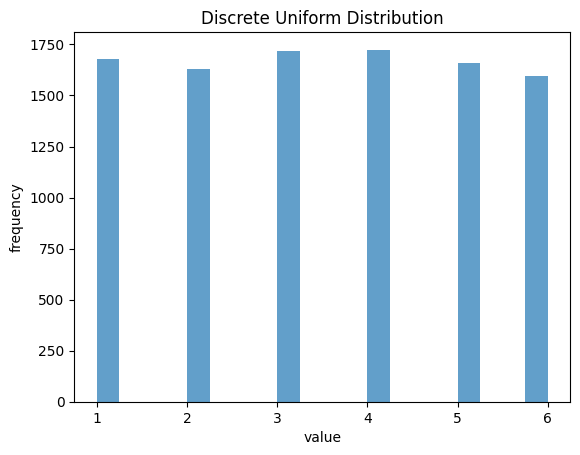

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# 이산 균등분포 예시 (주사위)
dice_values = np.random.randint(1, 7, size=10000)  # 1에서 6까지 균등하게 샘플링

# 시각화
plt.hist(dice_values, bins=20, alpha=0.7)
plt.title("Discrete Uniform Distribution")
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

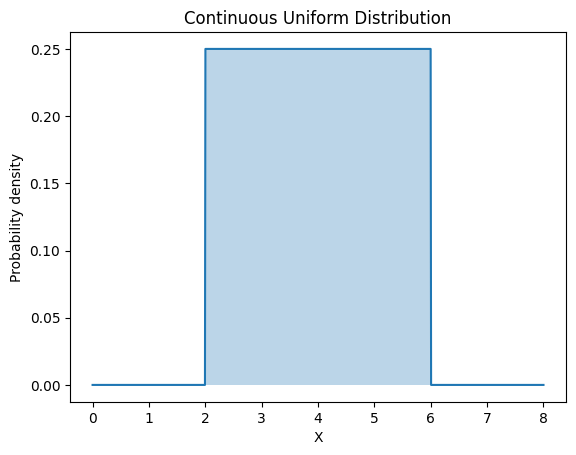

In [9]:
# 연속 균등분포 시각화
a, b = 2, 6  # 범위 [2, 6]
x = np.linspace(0, 8, 1000)
uniform_pdf = stats.uniform.pdf(x, loc=a, scale=b - a)

plt.plot(x, uniform_pdf)
plt.fill_between(x, uniform_pdf, where=[(a <= i <= b) for i in x], alpha=0.3)
plt.title("Continuous Uniform Distribution")
plt.xlabel("X")
plt.ylabel("Probability density")
plt.show()

# Normal Distribution

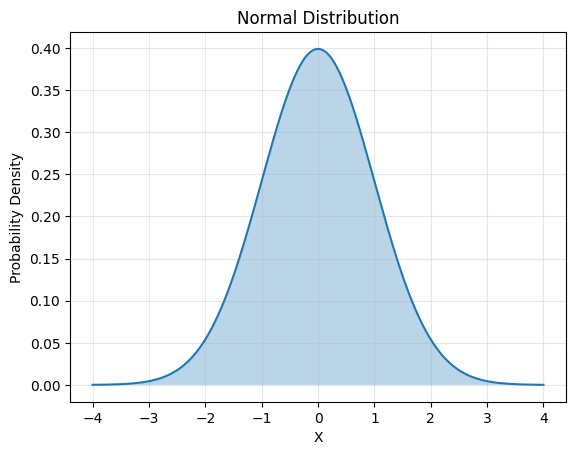

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# 정규 분포 시각화
mu, sigma = 0, 1  # 평균 0, 표준편차 1
x = np.linspace(-4, 4, 1000)
normal_pdf = stats.norm.pdf(x, mu, sigma)

plt.plot(x, normal_pdf)
plt.fill_between(x, normal_pdf, alpha=0.3)
plt.title("Normal Distribution")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.grid(True, alpha=0.3)
plt.show()

# Standard Normal Distribution

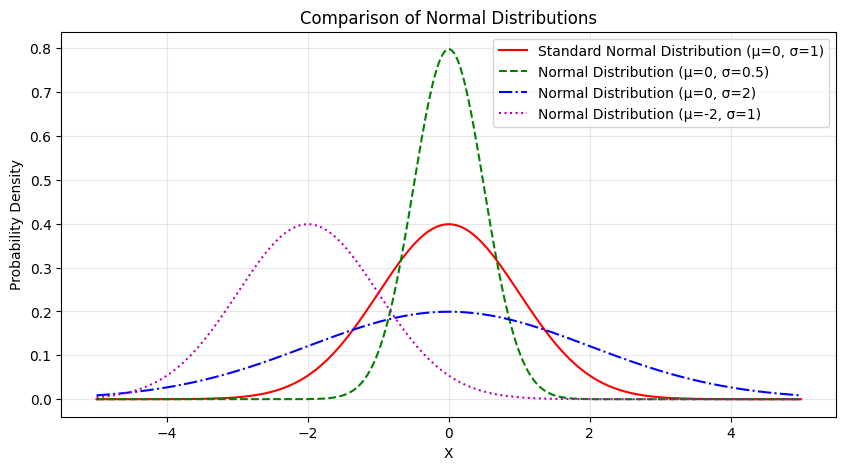

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# 여러 정규 분포와 표준 정규 분포 비교
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(10, 5))
plt.plot(x, stats.norm.pdf(x, 0, 1), "r-", label="Standard Normal Distribution (μ=0, σ=1)")
plt.plot(x, stats.norm.pdf(x, 0, 0.5), "g--", label="Normal Distribution (μ=0, σ=0.5)")
plt.plot(x, stats.norm.pdf(x, 0, 2), "b-.", label="Normal Distribution (μ=0, σ=2)")
plt.plot(x, stats.norm.pdf(x, -2, 1), "m:", label="Normal Distribution (μ=-2, σ=1)")

plt.title("Comparison of Normal Distributions")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

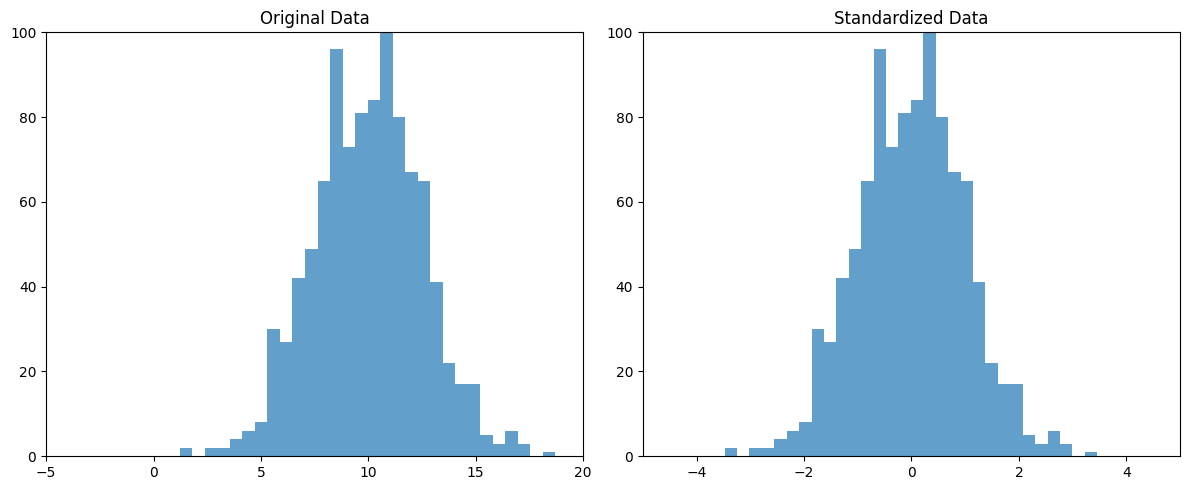

In [12]:
# 데이터 표준화 예시
import matplotlib.pyplot as plt
import numpy as np


# 정규 분포
data = np.random.normal(loc=10, scale=2.5, size=1000)  # 평균 10, 표준편차 2.5인 데이터

# 표준화
standardized_data = (data - np.mean(data)) / np.std(data)

# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, alpha=0.7)
plt.title("Original Data")
plt.xlim(-5, 20)
plt.ylim(0, 100)

plt.subplot(1, 2, 2)
plt.hist(standardized_data, bins=30, alpha=0.7)
plt.title("Standardized Data")
plt.xlim(-5, 5)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

# Bernoulli Distribution

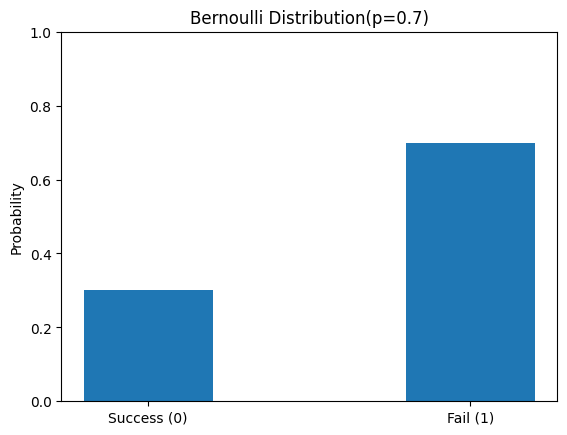

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# 베르누이 분포 시각화
p_success = 0.7  # 성공 확률
x = np.array([0, 1])
bernoulli_pmf = stats.bernoulli.pmf(x, p_success)

plt.bar(x, bernoulli_pmf, width=0.4)
plt.xticks([0, 1], ["Success (0)", "Fail (1)"])
plt.ylabel("Probability")
plt.title(f"Bernoulli Distribution(p={p_success})")
plt.ylim(0, 1)
plt.show()

# Binomial Distribution

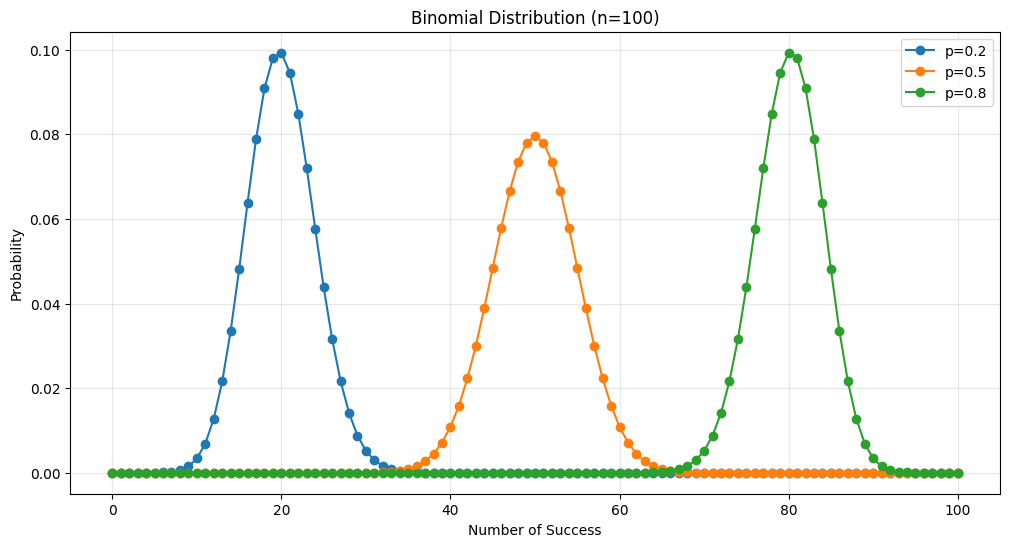

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


n_trials = 100  # 시행 횟수
success_probs = [0.2, 0.5, 0.8]  # 다양한 성공 확률
x = np.arange(0, n_trials + 1)

plt.figure(figsize=(12, 6))
for p in success_probs:
    binomial_pmf = stats.binom.pmf(x, n_trials, p)
    plt.plot(x, binomial_pmf, "o-", label=f"p={p}")

plt.title(f"Binomial Distribution (n={n_trials})")
plt.xlabel("Number of Success")
plt.ylabel("Probability")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
import numpy as np


# 이항 분포의 평균과 분산 계산 예시
n = 20
p = 0.3

mean = n * p
variance = n * p * (1 - p)
std_dev = np.sqrt(variance)

print(f"시행 횟수 n={n}, 성공 확률 p={p}")
print(f"평균(기댓값): {mean}")
print(f"분산: {variance}")
print(f"표준편차: {std_dev}")

# 시뮬레이션을 통한 검증
simulations = np.random.binomial(n, p, size=10000)
print("시뮬레이션 결과:")
print(f"평균: {np.mean(simulations)}")
print(f"분산: {np.var(simulations)}")
print(f"표준편차: {np.std(simulations)}")

시행 횟수 n=20, 성공 확률 p=0.3
평균(기댓값): 6.0
분산: 4.199999999999999
표준편차: 2.0493901531919194
시뮬레이션 결과:
평균: 5.998
분산: 4.146596
표준편차: 2.036319228411891


# Base Distribution

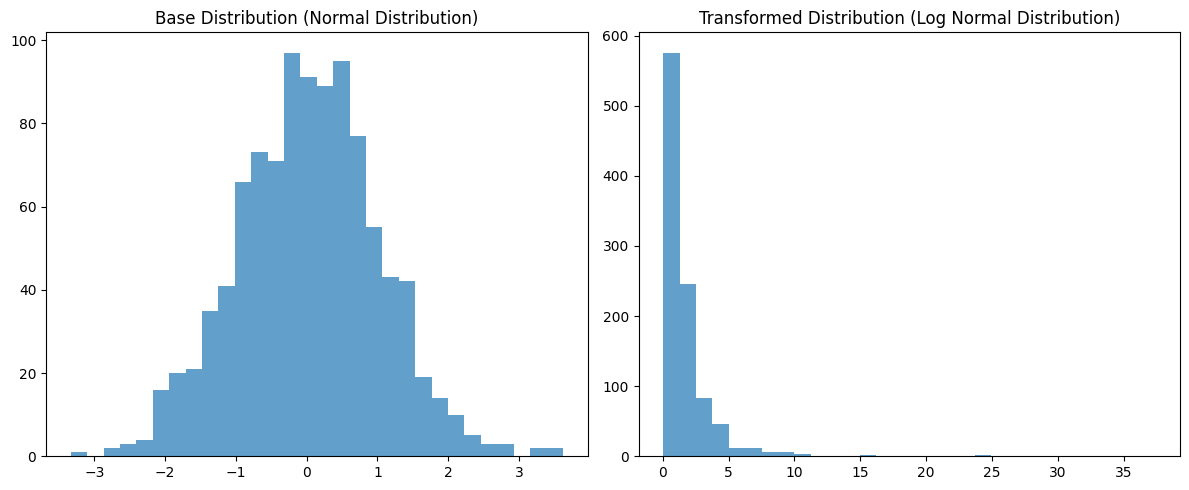

In [16]:
# 기저 분포(정규 분포)에서 비선형 변환을 통한 새로운 분포 생성 예시
import matplotlib.pyplot as plt
import torch
from torch import distributions


# 기저 분포로 정규 분포 사용
base_dist = distributions.Normal(loc=torch.tensor(0.0), scale=torch.tensor(1.0))


# 비선형 변환 함수
def nonlinear_transform(x):
    return torch.exp(x)  # 로그 정규 분포로 변환


# 변환된 샘플 생성
base_samples = base_dist.sample((1000,))
transformed_samples = nonlinear_transform(base_samples)

# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(base_samples.numpy(), bins=30, alpha=0.7)
plt.title("Base Distribution (Normal Distribution)")
plt.subplot(1, 2, 2)
plt.hist(transformed_samples.numpy(), bins=30, alpha=0.7)
plt.title("Transformed Distribution (Log Normal Distribution)")
plt.tight_layout()
plt.show()

# Sampling Distribution


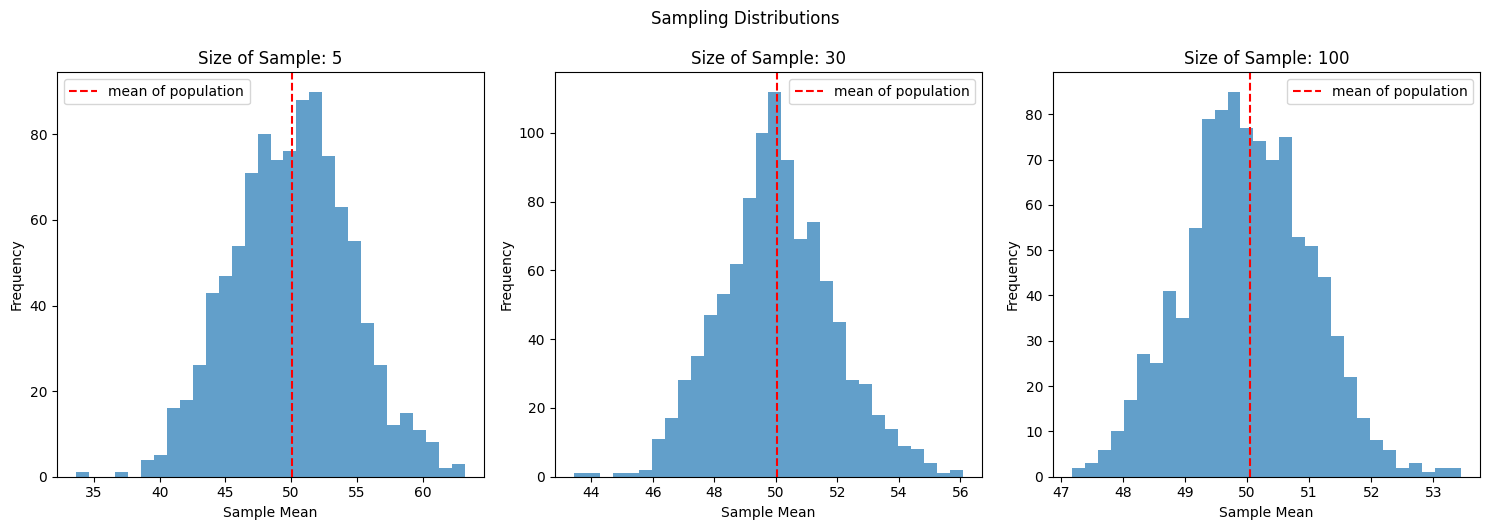

In [17]:
import matplotlib.pyplot as plt
import numpy as np


# 표본 평균의 표집 분포 시뮬레이션
population = np.random.normal(loc=50, scale=10, size=100000)  # 모집단
sample_sizes = [5, 30, 100]
n_samples = 1000

plt.figure(figsize=(15, 5))
for i, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(population, size=size)) for _ in range(n_samples)]

    plt.subplot(1, 3, i + 1)
    plt.hist(sample_means, bins=30, alpha=0.7)
    plt.axvline(np.mean(population), color="r", linestyle="--", label="mean of population")
    plt.title(f"Size of Sample: {size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.suptitle("Sampling Distributions", y=1.05)
plt.show()